In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

D:\Program Files\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("Merged_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425558 entries, 0 to 1425557
Data columns (total 49 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Accident_Index                    1425558 non-null  object 
 1   1st_Road_Class                    1425558 non-null  float64
 2   Accident_Severity                 1425558 non-null  int64  
 3   Carriageway_Hazards               1425558 non-null  float64
 4   Date                              1425558 non-null  object 
 5   Day_of_Week                       1425558 non-null  int64  
 6   Junction_Detail                   1425558 non-null  float64
 7   Latitude                          1425558 non-null  float64
 8   Light_Conditions                  1425558 non-null  float64
 9   Local_Authority_(District)        1425558 non-null  float64
 10  Longitude                         1425558 non-null  float64
 11  Number_of_Casualties              142

## 2. Preprocessing the Data

### 2.1. Handling Date and Time

In [4]:
data['Date']= pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['Date'].tail()

1425553   2021-03-28
1425554   2021-03-12
1425555   2021-01-04
1425556   2021-03-15
1425557   2021-03-15
Name: Date, dtype: datetime64[ns]

Next, let's define a new column that groups the Time the accidents happened into one of five options:

* Morning Rush from 5am to 10am --> value 1
* Office Hours from 10am to 3pm (or: 10:00 - 15:00) --> value 2
* Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00) --> value 3
* Evening from 7pm to 11pm (or: 19:00 - 23:00) --> value 4
* Night from 11pm to 5am (or: 23:00 - 05:00) --> value 5

In [5]:
# slice first and second string from time column
data['Hour'] = data['Time'].str[0:2]

# convert new column to numeric datetype
data['Hour'] = pd.to_numeric(data['Hour'])

# drop null values in our new column
data = data.dropna(subset=['Hour'])

# cast to integer values
data['Hour'] = data['Hour'].astype('int')

In [6]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [7]:
# create a little dictionary to later look up the groups I created
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [8]:
# apply this function to our temporary hour column
data['Daytime'] = data['Hour'].apply(when_was_it)
data[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
0,17:36,17,3
1,00:15,0,5
2,10:35,10,2
3,22:43,22,4
4,00:42,0,5


In [9]:
# drop old time column and temporary hour column
data = data.drop(columns=['Time', 'Hour'])

### 2.2. Handling Missing Values

In [10]:
print('Proportion of Missing Values in Accidents Table:', 
      round(data.isna().sum().sum()/len(data), 3), '%')

Proportion of Missing Values in Accidents Table: 0.0 %


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425558 entries, 0 to 1425557
Data columns (total 49 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   Accident_Index                    1425558 non-null  object        
 1   1st_Road_Class                    1425558 non-null  float64       
 2   Accident_Severity                 1425558 non-null  int64         
 3   Carriageway_Hazards               1425558 non-null  float64       
 4   Date                              1425558 non-null  datetime64[ns]
 5   Day_of_Week                       1425558 non-null  int64         
 6   Junction_Detail                   1425558 non-null  float64       
 7   Latitude                          1425558 non-null  float64       
 8   Light_Conditions                  1425558 non-null  float64       
 9   Local_Authority_(District)        1425558 non-null  float64       
 10  Longitude         

## Feature Deletion

In [12]:
Y = data['Accident_Severity']

In [13]:
X_temp=data.drop(columns = ['Accident_Severity','Casualty_Severity']) # Removing the two target variables.

In [14]:
X=X_temp.drop(columns = ['Accident_Index','Date','Latitude','Longitude']) # Removing independent variables that cannot be predicted categorically.

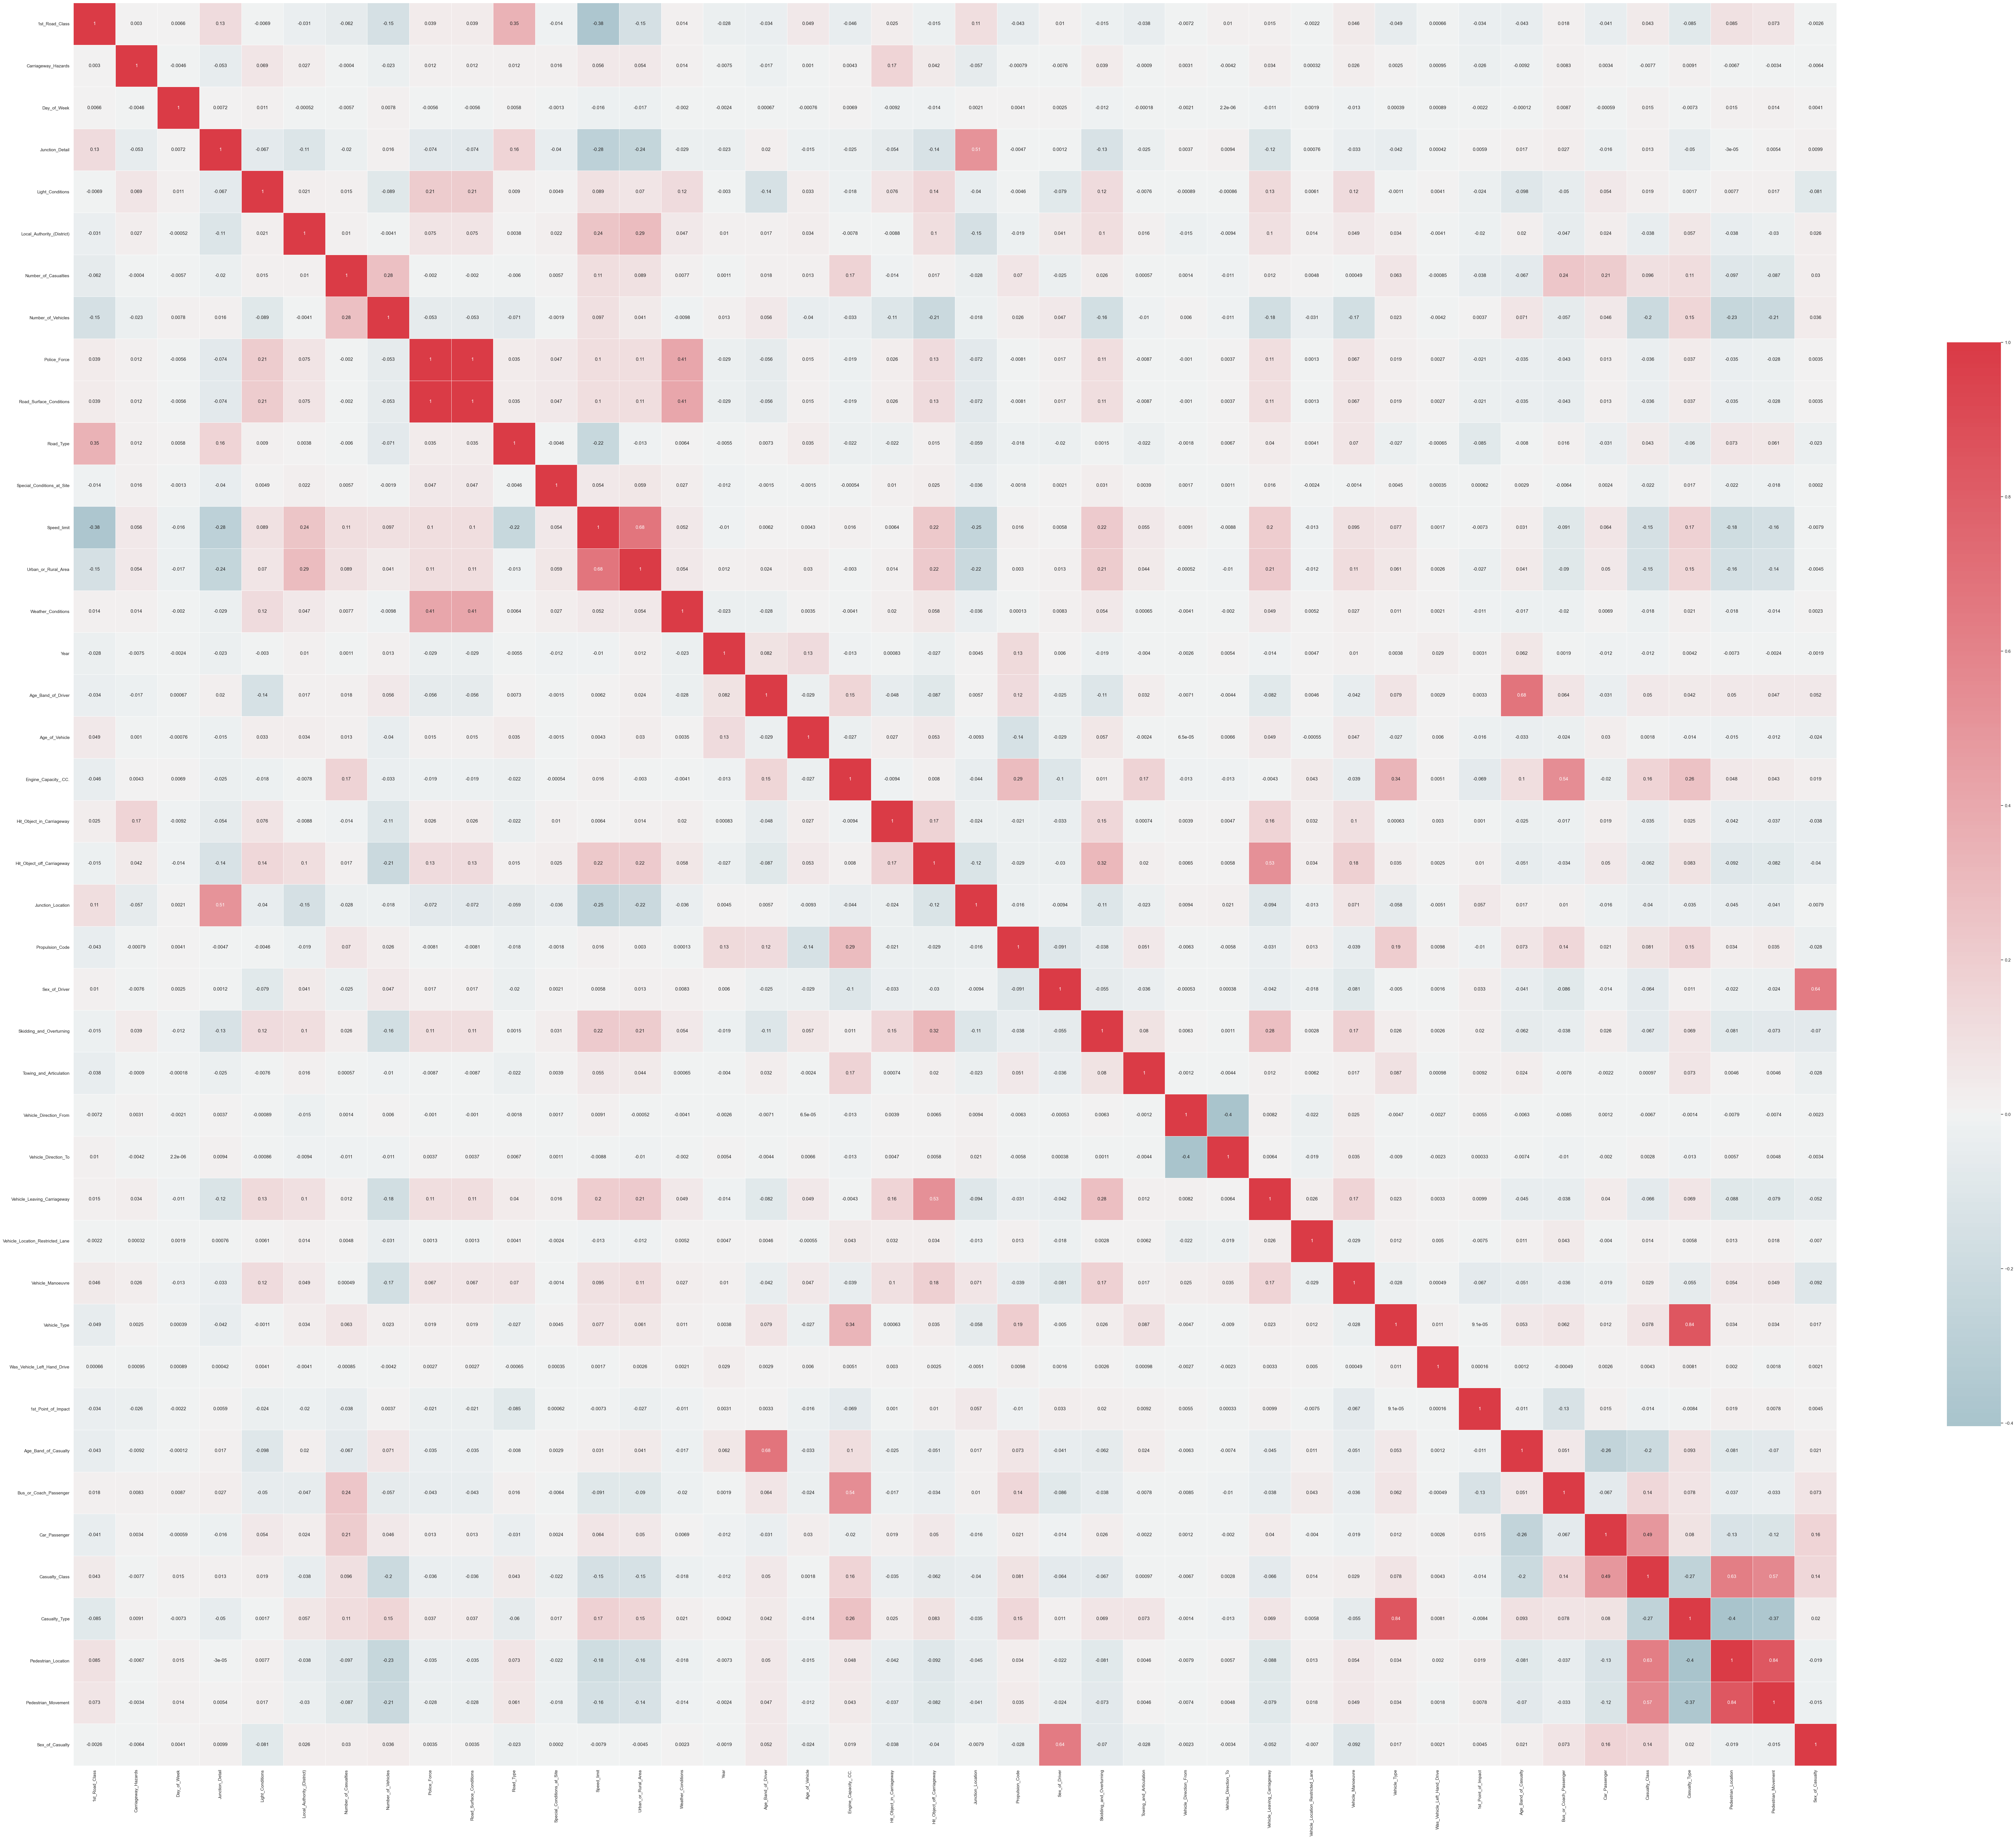

In [15]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = X.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100,99))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [16]:
X = X.drop(columns = ["Police_Force","Urban_or_Rural_Area","Junction_Location","Vehicle_Leaving_Carriageway","Age_Band_of_Driver",
                      "Bus_or_Coach_Passenger","Sex_of_Casualty","Casualty_Type","Casualty_Class","Pedestrian_Location"])

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425558 entries, 0 to 1425557
Data columns (total 33 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   1st_Road_Class                    1425558 non-null  float64
 1   Carriageway_Hazards               1425558 non-null  float64
 2   Day_of_Week                       1425558 non-null  int64  
 3   Junction_Detail                   1425558 non-null  float64
 4   Light_Conditions                  1425558 non-null  float64
 5   Local_Authority_(District)        1425558 non-null  float64
 6   Number_of_Casualties              1425558 non-null  int64  
 7   Number_of_Vehicles                1425558 non-null  int64  
 8   Road_Surface_Conditions           1425558 non-null  float64
 9   Road_Type                         1425558 non-null  float64
 10  Special_Conditions_at_Site        1425558 non-null  float64
 11  Speed_limit                       142

In [18]:
print(Y.shape)

print(X.shape)


(1425558,)
(1425558, 33)


In [19]:
for col in ['1st_Road_Class','Carriageway_Hazards','Day_of_Week','Junction_Detail','Light_Conditions','Local_Authority_(District)', 
            'Road_Surface_Conditions','Road_Type','Special_Conditions_at_Site','Weather_Conditions',
            'Year','Age_of_Vehicle','Hit_Object_in_Carriageway','Hit_Object_off_Carriageway','Hit_Object_off_Carriageway',
            'Propulsion_Code','Sex_of_Driver','Skidding_and_Overturning','Towing_and_Articulation','Vehicle_Direction_From','Vehicle_Direction_To',
            'Vehicle_Location_Restricted_Lane','Vehicle_Manoeuvre','Vehicle_Type',
            'Was_Vehicle_Left_Hand_Drive','1st_Point_of_Impact','Age_Band_of_Casualty','Car_Passenger',
            'Pedestrian_Movement','Daytime']:
    X[col] = X[col].astype('category')

In [21]:
#X.to_csv("X_k.csv",index = None)
#Y.to_csv("y_k.csv",index = None)

In [22]:
%time
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,Y)


CPU times: total: 0 ns
Wall time: 0 ns


RandomForestClassifier()

In [23]:
names= X.columns
print("Features sorted by their score:")
print(sorted(zip(map(lambda x:round(x,4),rf.feature_importances_),names)))

Features sorted by their score:
[(0.0004, 'Was_Vehicle_Left_Hand_Drive'), (0.0015, 'Towing_and_Articulation'), (0.003, 'Vehicle_Location_Restricted_Lane'), (0.0042, 'Carriageway_Hazards'), (0.0053, 'Special_Conditions_at_Site'), (0.0085, 'Car_Passenger'), (0.0093, 'Hit_Object_in_Carriageway'), (0.0105, 'Sex_of_Driver'), (0.012, 'Propulsion_Code'), (0.0128, 'Pedestrian_Movement'), (0.0157, 'Road_Type'), (0.0167, 'Light_Conditions'), (0.0177, 'Weather_Conditions'), (0.0181, 'Road_Surface_Conditions'), (0.0197, 'Skidding_and_Overturning'), (0.0214, 'Hit_Object_off_Carriageway'), (0.0247, '1st_Road_Class'), (0.0279, '1st_Point_of_Impact'), (0.0284, 'Number_of_Vehicles'), (0.0286, 'Junction_Detail'), (0.0294, 'Speed_limit'), (0.03, 'Vehicle_Type'), (0.036, 'Daytime'), (0.0421, 'Vehicle_Manoeuvre'), (0.0472, 'Number_of_Casualties'), (0.0474, 'Vehicle_Direction_To'), (0.0477, 'Vehicle_Direction_From'), (0.0479, 'Age_Band_of_Casualty'), (0.0519, 'Day_of_Week'), (0.0686, 'Year'), (0.0736, 'Age_

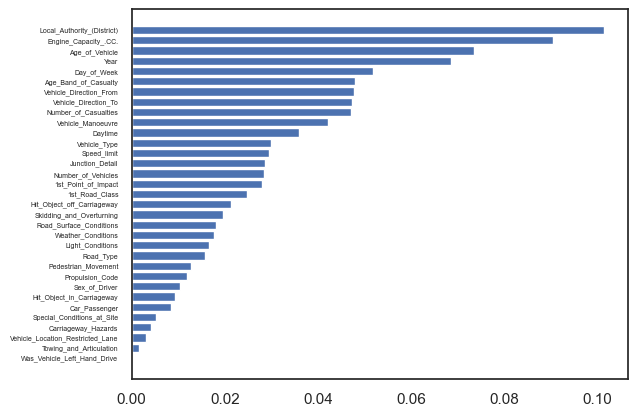

In [30]:

per_data = sorted(zip(map(lambda x:round(x,4),rf.feature_importances_),names))

# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
name_list = []#feature name
per_list = []
for i in range(0,33):
    name_list.append(per_data[i][1])
for j in range(0,33):
    per_list.append(per_data[j][0])

plt.rcParams['axes.unicode_minus'] = False
plt.yticks(fontsize=5)
plt.barh(range(len(per_list)), per_list,tick_label = name_list)
plt.show()

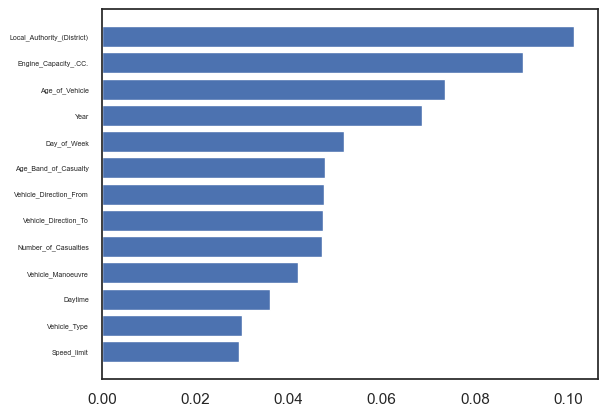

In [39]:
num  = 32
percent = 0.0
while percent <= 0.7:
    percent += per_list[num]
    num -= 1

keep_name_list = []#feature name
keep_per_list = []

for i in range(0,33):
    if i > num:
        keep_name_list.append(per_data[i][1])
for j in range(0,33):
    if j > num:
        keep_per_list.append(per_data[j][0])

plt.rcParams['axes.unicode_minus'] = False
plt.yticks(fontsize=5)
plt.barh(range(len(keep_per_list)), keep_per_list,tick_label = keep_name_list)
plt.show()

### 2.4. Handling Numerical Data

In [40]:
keep_name_list

['Speed_limit',
 'Vehicle_Type',
 'Daytime',
 'Vehicle_Manoeuvre',
 'Number_of_Casualties',
 'Vehicle_Direction_To',
 'Vehicle_Direction_From',
 'Age_Band_of_Casualty',
 'Day_of_Week',
 'Year',
 'Age_of_Vehicle',
 'Engine_Capacity_.CC.',
 'Local_Authority_(District)']

In [41]:
# define numerical columns
num_cols = ['Engine_Capacity_.CC.','Age_of_Vehicle','Number_of_Casualties','Speed_limit']
# plotting boxplots
sns.set(style='darkgrid')
fig, axes = plt.subplots(2,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    data.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout()

In [42]:
data['Engine_Capacity_.CC.'].describe()

count    1.425558e+06
mean     1.759148e+03
std      1.482773e+03
min      1.000000e+00
25%      1.240000e+03
50%      1.589000e+03
75%      1.968000e+03
max      9.999900e+04
Name: Engine_Capacity_.CC., dtype: float64

In [43]:
# phrasing condition
condition = (data['Engine_Capacity_.CC.'] < 20000)

# keep only records that meet the condition and don't fall within extreme outliers
data = data[condition]

In [44]:
data['Age_of_Vehicle'].describe()

count    1.425503e+06
mean     7.190818e+00
std      4.969052e+00
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.110000e+02
Name: Age_of_Vehicle, dtype: float64

In [45]:
age_of_vehicle_bins = {1: '0 to <2 years', 
                       2: '2 to <3 years', 
                       3: '3 to <7 years', 
                       4: '7 to <10 years', 
                       5: '>=10 years'}

In [46]:
# arguments in bins parameter denote left edge of each bin
data['Age_of_Vehicle'] = np.digitize(data['Age_of_Vehicle'], bins=[0,2,3,7,10])

# convert into categorical column
data['Age_of_Vehicle'] = data['Age_of_Vehicle'].astype('category')

# check the count within each bucket
data['Age_of_Vehicle'].value_counts().sort_index()

1    178967
2    103305
3    405676
4    296166
5    441389
Name: Age_of_Vehicle, dtype: int64

In [47]:
data['Number_of_Casualties'].describe()

count    1.425503e+06
mean     2.016497e+00
std      2.251625e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.300000e+01
Name: Number_of_Casualties, dtype: float64

In [48]:
data['Number_of_Casualties'].unique()

array([ 1,  2,  4,  3,  5,  6,  7, 10,  8,  9, 17, 11, 19, 15, 12, 16, 14,
       13, 23, 18, 20, 29, 21, 22, 45, 26, 41, 36, 40, 25, 28, 42, 68, 27,
       32, 48, 24, 43, 87, 51, 33, 38, 46, 70, 93, 54, 58, 34],
      dtype=int64)

In [49]:
number_of_casualties_bins = {1: '1 casualties', 
                           2: '2 casualties', 
                           3: '3 casualties', 
                           4: '4 casualties', 
                           5: '>=5 casualties'}

In [50]:
# arguments in bins parameter denote left edge of each bin
data['Number_of_Casualties'] = np.digitize(data['Number_of_Casualties'], bins=[1,2,3,4,5])

# convert into categorical column
data['Number_of_Casualties'] = data['Number_of_Casualties'].astype('category')

# check the count within each bucket
data['Number_of_Casualties'].value_counts().sort_index()

1    712952
2    378681
3    172179
4     84299
5     77392
Name: Number_of_Casualties, dtype: int64

In [51]:
data['Speed_limit'].describe()

count    1.425503e+06
mean     4.446533e+01
std      1.576439e+01
min      1.000000e+01
25%      3.000000e+01
50%      4.000000e+01
75%      6.000000e+01
max      7.000000e+01
Name: Speed_limit, dtype: float64

In [52]:
data['Speed_limit'].unique()

array([30., 40., 50., 20., 60., 70., 10.])

In [53]:
Speed_limit_bins = {1: '10 15 20', 
                       2: '30 ', 
                       3: '40 50', 
                       4: '60 70',}

In [54]:
# arguments in bins parameter denote left edge of each bin
data['Speed_limit'] = np.digitize(data['Speed_limit'], bins=[10,30,50,70])

# convert into categorical column
data['Speed_limit'] = data['Speed_limit'].astype('category')

# check the count within each bucket
data['Speed_limit'].value_counts().sort_index()

1      9919
2    818115
3    398348
4    199121
Name: Speed_limit, dtype: int64

In [55]:
# re-define numerical feature columns - only one left
num_cols = ['Engine_Capacity_.CC.']

### 2.5. Handling Categorical Data

In [56]:
# define categorical feature columns
cat_cols = [ 'Speed_limit',
 'Vehicle_Type',
 'Daytime',
 'Vehicle_Manoeuvre',
 'Number_of_Casualties',
 'Vehicle_Direction_To',
 'Vehicle_Direction_From',
 'Age_Band_of_Casualty',
 'Day_of_Week',
 'Year',
 'Age_of_Vehicle',
 'Engine_Capacity_.CC.',
 'Local_Authority_(District)']

# define target col
target_col = ['Accident_Severity']

cols = cat_cols + num_cols + target_col

# copy dataframe - just to be safe
data_model = data[cols].copy()
data_model.shape

(1425503, 15)

In [57]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(data_model[cat_cols], drop_first=True)
df_model = pd.concat([data_model[num_cols], data_model[target_col], dummies], axis=1)
df_model.shape

(1425503, 28)

In [58]:
df_model.isna().sum().sum()

0

In [ ]:
X = df_model.drop(columns = ["Accident_Severity"])
y = df_model['Accident_Severity']

In [ ]:
X.to_csv("X_.csv",index = None)
y.to_csv("y_csv",index = None)